In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# read data from csv files
zoo_data = pd.read_csv('zoo.csv')
class_data = pd.read_csv('class.csv')

### data preprocessing
# remove the first column 'animal_name' and exclude the label column to obtain X
X = zoo_data.iloc[:,1:17]
# extract the label column to obtain y
y = zoo_data.iloc[:,17]

# fill up missing values, if any
# We will assume any missing values take on value 0, which is equivalent to False in boolean
for feature_name in X.columns:
    for i in range(len(X[feature_name].isnull())):
        if X[feature_name].isnull()[i] == True:
            X[feature_name][i] = 0

# take a look at what our preprocessed data looks like
print(X)
###


     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
209     0         0     1     0         1        0         1        0   
210     0         0     1     0         0        0         0        0   
211     0         0     1     0         0        0         0        0   
212     1         0     1     0         0        0         1        0   
213     1         0     1     0         0        0         1        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [2]:
### building a ML model
# training/validation/test splits
X_train = X.iloc[:170]
X_validation = X.iloc[170:192]
X_test = X.iloc[192:214]

y_train = y.iloc[:170]
y_validation = y.iloc[170:192]
y_test = y.iloc[192:214]

In [3]:
# a model with all default hyperparameters
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)

print(rdf.score(X_train,y_train))
print(rdf.score(X_validation,y_validation))
print(rdf.score(X_test,y_test))

1.0
0.9090909090909091
0.8636363636363636


In [6]:
### Tuning Hyperparameters
# Randomized Search Cross Validation
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto','None']
max_depth = [int(x) for x in np.linspace(start=5,stop=16)]
min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,5,10,20]
bootstrap = [True,False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rdf_random = RandomizedSearchCV(estimator=rdf, param_distributions=random_grid, n_iter=100, n_jobs=-1)
rdf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [7]:
rdf_random.best_params_

{'n_estimators': 1366,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': True}

In [8]:
# Grid Search Cross Validation
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 4, 6, 8, 10 ],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [1200, 1400]
}

grid_search = GridSearchCV(estimator = rdf, param_grid = param_grid, 
                          n_jobs = -1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [9]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [10]:
rdf = RandomForestClassifier(n_estimators = 1200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth = 4)
rdf.fit(X_train,y_train)
print(rdf.score(X_train,y_train))
print(rdf.score(X_validation,y_validation))
print(rdf.score(X_test,y_test))

0.9764705882352941
0.9545454545454546
0.8636363636363636


In [16]:
# use oob error instead of validation set and do train/test split
X_train = X.iloc[:180]
X_test = X.iloc[180:214]
y_train = y.iloc[:180]
y_test = y.iloc[180:214]
rdf = RandomForestClassifier(oob_score=True, n_estimators = 1200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth = 4)
rdf.fit(X_train,y_train)
print(rdf.score(X_train,y_train))
print(rdf.score(X_test,y_test))

0.9777777777777777
0.8823529411764706


In [21]:
# trying on the 7:3 ratio on train/test split
X_train = X.iloc[:150]
X_test = X[150:214]
y_train = y.iloc[:150]
y_test = y.iloc[150:214]
rdf = RandomForestClassifier(oob_score=True, n_estimators = 1200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth = 4)
rdf.fit(X_train,y_train)
print(rdf.score(X_train,y_train))
print(rdf.score(X_test,y_test))
###

0.9733333333333334
0.921875


In [23]:
### Results Analysis
from sklearn.metrics import confusion_matrix

y_train_pred = rdf.predict(X_train)
y_test_pred = rdf.predict(X_test)

conf_m_train = confusion_matrix(y_train_pred, y_train)
conf_m_test = confusion_matrix(y_test_pred, y_test)

print(conf_m_train)
print(conf_m_test)


[[47  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 17  0  3  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 20  1]
 [ 0  0  0  0  0  0 15]]
[[13  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  2  0  6  0  0]
 [ 0  0  0  0  0  5  3]
 [ 0  0  0  0  0  0  1]]


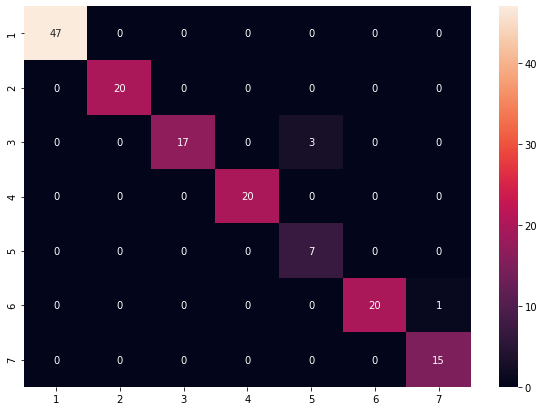

In [32]:
# plotting results
import seaborn as sn
import matplotlib.pyplot as plt
cfm_train = pd.DataFrame(conf_m_train, index = [i for i in "1234567"], columns = [i for i in "1234567"])
plt.figure(figsize = (10,7))
sn.heatmap(cfm_train, annot=True)

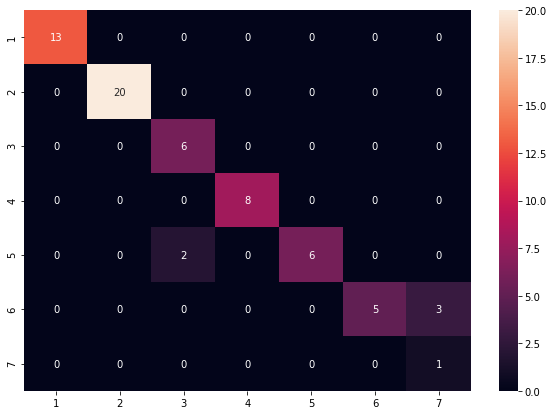

In [34]:
cfm_test = pd.DataFrame(conf_m_test, index = [i for i in "1234567"], columns = [i for i in "1234567"])
plt.figure(figsize = (10,7))
sn.heatmap(cfm_test, annot=True)
###